/var/folders/gr/4y13phdj20gdftt920l0kd4c0000gn/T/ipykernel_2343/3085209951.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


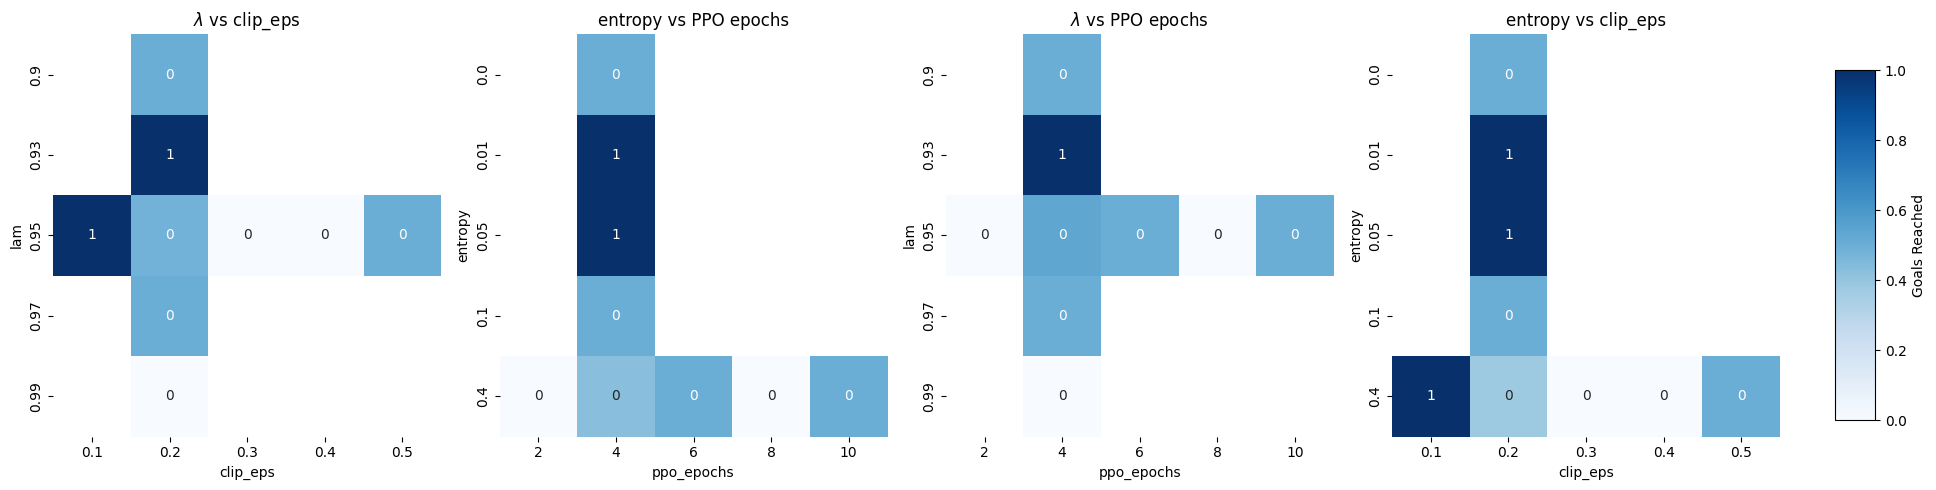

In [28]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('ppo_evaluation_results.csv')

# Define the parameter pairs and titles
param_plots = [
    ('lam', 'clip_eps', r'$\lambda$ vs clip_eps'),
    ('entropy', 'ppo_epochs', 'entropy vs PPO epochs'),
    ('lam', 'ppo_epochs', r'$\lambda$ vs PPO epochs'),
    ('entropy', 'clip_eps', 'entropy vs clip_eps')
]

# Create subplots: one row, one column per plot
fig, axes = plt.subplots(1, len(param_plots), figsize=(5 * len(param_plots), 5))

# Loop over each parameter pair and create a heatmap
for ax, (index_param, column_param, title) in zip(axes, param_plots):
    pivot = df.pivot_table(values='goals_reached', index=index_param, columns=column_param, aggfunc='mean')
    sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues", ax=ax, cbar=False)
    ax.set_title(title)
    ax.set_xlabel(column_param)
    ax.set_ylabel(index_param)

# Add a single colorbar on the right
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=df['goals_reached'].min(), vmax=df['goals_reached'].max()))
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax, label='Goals Reached')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()
